In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, roc_curve
)

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/processed/diabetes_clean_model_ready.csv")
df.shape, df.head()


((253680, 19),
    HighBP  HighChol   BMI  Smoker  Stroke  HeartDiseaseorAttack  PhysActivity  \
 0     1.0       1.0  40.0     1.0     0.0                   0.0           0.0   
 1     0.0       0.0  25.0     1.0     0.0                   0.0           1.0   
 2     1.0       1.0  28.0     0.0     0.0                   0.0           0.0   
 3     1.0       0.0  27.0     0.0     0.0                   0.0           1.0   
 4     1.0       1.0  24.0     0.0     0.0                   0.0           1.0   
 
    HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  \
 0                0.0            1.0          0.0      5.0      18.0      15.0   
 1                0.0            0.0          1.0      3.0       0.0       0.0   
 2                0.0            1.0          1.0      5.0      30.0      30.0   
 3                0.0            1.0          0.0      2.0       0.0       0.0   
 4                0.0            1.0          0.0      2.0       3.0       0.0   

In [3]:
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

X.shape, y.shape


((253680, 18), (253680,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((190260, 18), (63420, 18))

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## MODEL 1 — LOGISTIC REGRESSION (Baseline)

In [6]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_prob_log))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8631661936297698
Logistic Regression ROC-AUC: 0.8198795963024947

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     54583
           1       0.53      0.16      0.24      8837

    accuracy                           0.86     63420
   macro avg       0.70      0.57      0.58     63420
weighted avg       0.83      0.86      0.83     63420



## MODEL 2 — RANDOM FOREST

In [8]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8643645537685273
Random Forest ROC-AUC: 0.8213467540562992

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     54583
           1       0.60      0.08      0.14      8837

    accuracy                           0.86     63420
   macro avg       0.74      0.53      0.53     63420
weighted avg       0.83      0.86      0.82     63420



## MODEL 3 — GRADIENT BOOSTING (High-Performance Model)

In [10]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

gb_model.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [11]:
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, y_prob_gb))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8645380006307158
Gradient Boosting ROC-AUC: 0.8275430361744543

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     54583
           1       0.55      0.16      0.25      8837

    accuracy                           0.86     63420
   macro avg       0.71      0.57      0.59     63420
weighted avg       0.83      0.86      0.83     63420



## ROC CURVE COMPARISON

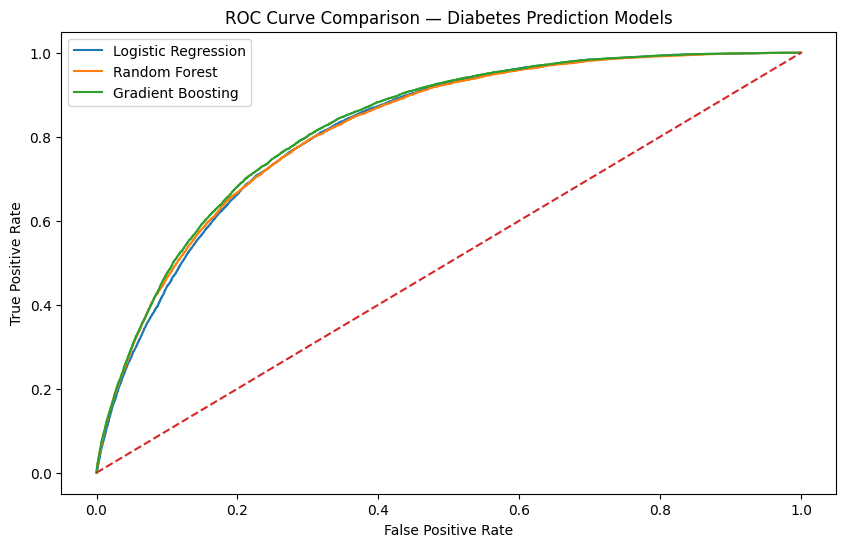

In [12]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

plt.figure(figsize=(10, 6))

plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_gb, tpr_gb, label="Gradient Boosting")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison — Diabetes Prediction Models")
plt.legend()
plt.show()


In [13]:
rf_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

rf_importance.head(10)


GenHlth                 0.235103
HighBP                  0.226683
BMI                     0.163023
HighChol                0.094863
DiffWalk                0.077787
Age                     0.064136
HeartDiseaseorAttack    0.046133
PhysHlth                0.027486
Income                  0.023664
Education               0.008349
dtype: float64

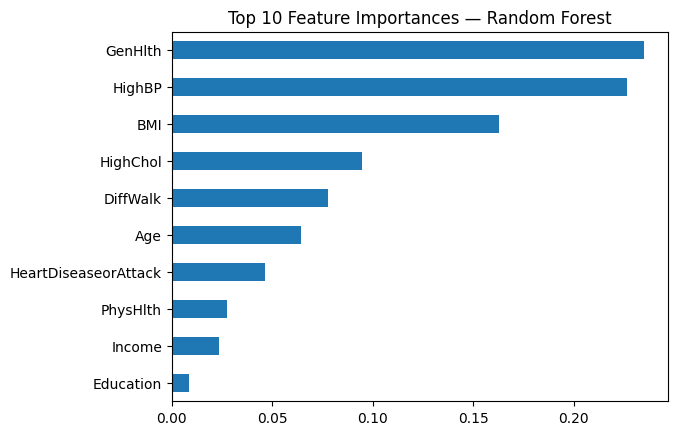

In [14]:
rf_importance.head(10).plot(kind="barh")
plt.title("Top 10 Feature Importances — Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [17]:
import joblib

joblib.dump(log_model, "../models/logistic_model.pkl")
joblib.dump(rf_model, "../models/random_forest_model.pkl")
joblib.dump(gb_model, "../models/gradient_boosting_model.pkl")

print("✅ Models saved successfully.")


✅ Models saved successfully.
